<a href="https://colab.research.google.com/github/gustavogit4/An-lise-explorat-ria-Antropom-trica/blob/main/an_lise_explorat_ria_dos_dados_da_ansur_i_1998.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importação de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Leitura e exploração inicial dos dados
df = pd.read_excel("2 - ANSUR I 1988.xlsx")
df.head()

,AGE,HEIGHT,WEIGHT,FOOT LENGTH,HEAD CIRC,CHEST CIRC,NECK CIRC,WAIST CIRC,SHOULDER WIDTH,SITTING HT,SITTING KNEE HT,SITTING EYE HT,NAVAL HT,PUPILS DIST,ARM SPAN,WRITING HAND,GENDER (1=M)
0,34,1735,88.3,260,572,1052,434,949,490,888,551,763,1029,68,1813,1,1
1,37,1830,86.5,290,590,1029,383,916,485,905,601,797,1128,67,1916,1,1
2,38,1726,71.3,254,572,995,379,834,500,907,531,791,1024,63,1827,1,1
3,33,1783,81.6,271,593,966,412,825,484,948,546,820,1055,71,1846,1,1
4,42,1669,75.6,240,546,1032,372,914,479,856,540,726,978,56,1712,1,1


In [ ]:
# Descobrindo a existência de valores nulos ou ausentes
df.isnull().sum()

,0
AGE,0
HEIGHT,0
WEIGHT,0
FOOT LENGTH,0
HEAD CIRC,0
CHEST CIRC,0
NECK CIRC,0
WAIST CIRC,0
SHOULDER WIDTH,0
SITTING HT,0


In [ ]:
# Resumir as variáveis numéricas
df.describe()

,AGE,HEIGHT,WEIGHT,FOOT LENGTH,HEAD CIRC,CHEST CIRC,NECK CIRC,WAIST CIRC,SHOULDER WIDTH,SITTING HT,SITTING KNEE HT,SITTING EYE HT,NAVAL HT,PUPILS DIST,ARM SPAN,WRITING HAND,GENDER (1=M)
count,3982.000000,3982.000000,3982.000000,3982.000000,3982.000000,3982.000000,3982.000000,3982.000000,3982.000000,3982.000000,3982.000000,3982.000000,3982.000000,3982.000000,3982.000000,3982.000000,3982.000000
mean,26.638122,1685.699900,69.353214,255.654696,555.773230,944.632848,344.156454,776.483174,458.953039,879.563787,534.739076,762.438724,1016.275741,61.759166,1739.241587,1.122551,0.445505
std,6.241669,90.446089,12.674489,17.814418,18.372627,78.206258,36.193344,88.748261,38.055936,46.775792,34.587067,42.836576,62.685808,41.389488,110.911779,0.354465,0.497084
min,17.000000,1428.000000,41.300000,203.000000,500.000000,711.000000,272.000000,568.000000,369.000000,748.000000,406.000000,640.000000,802.000000,-999.000000,1356.000000,0.000000,0.000000
25%,22.000000,1617.000000,60.000000,242.000000,542.000000,888.000000,313.000000,708.000000,428.000000,844.000000,510.000000,731.000000,971.000000,61.000000,1658.000000,1.000000,0.000000
50%,25.000000,1682.000000,67.600000,255.000000,555.000000,940.000000,335.000000,766.000000,455.000000,878.000000,533.000000,761.000000,1015.000000,63.000000,1737.000000,1.000000,0.000000
75%,31.000000,1752.000000,77.600000,268.000000,568.000000,996.000000,375.000000,835.000000,489.000000,913.000000,558.000000,793.000000,1058.000000,66.000000,1817.000000,1.000000,1.000000
max,51.000000,2042.000000,127.800000,310.000000,627.000000,1281.000000,470.000000,1122.000000,593.000000,1032.000000,675.000000,903.000000,1305.000000,78.000000,2159.000000,3.000000,1.000000


In [ ]:
# Definindo as colunas de interesse
colunas = ['HEIGHT', 'WEIGHT']

# Loop para calcular os outliers para cada uma das colunas
for coluna in colunas:
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1

    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Identificando os outliers
    outliers = df[(df[coluna] < limite_inferior) | (df[coluna] > limite_superior)]

    # Exibindo os outliers encontrados
    print(f"Outliers encontrados na coluna {coluna}:")
    print(outliers[[coluna]])
    print("\n")  # Adicionando uma linha em branco para separar as saídas

Outliers encontrados na coluna HEIGHT:
      HEIGHT
411     2012
780     1955
1287    2042


Outliers encontrados na coluna WEIGHT:
      WEIGHT
40     105.3
48     107.6
101    106.9
194    104.9
218    104.2
252    121.7
400    108.3
420    106.5
503    117.0
658    109.5
660    111.2
704    104.4
722    106.7
817    106.7
821    127.8
880    104.3
894    108.2
911    104.1
960    105.7
1031   109.4
1139   108.2
1206   116.9
1253   104.3
1260   111.4
1262   112.1
1431   105.9
1462   109.2
1502   104.3
1565   108.3
1572   113.7
1591   106.2
1644   104.7
1651   112.8
1676   124.3
1742   104.9




Manter os outliers na análise pois os valores fora do intervalo IQR parecem estar associados a casos extremos, mas não necessariamente errados. Por isso, decidimos manter os outliers para uma análise mais completa.

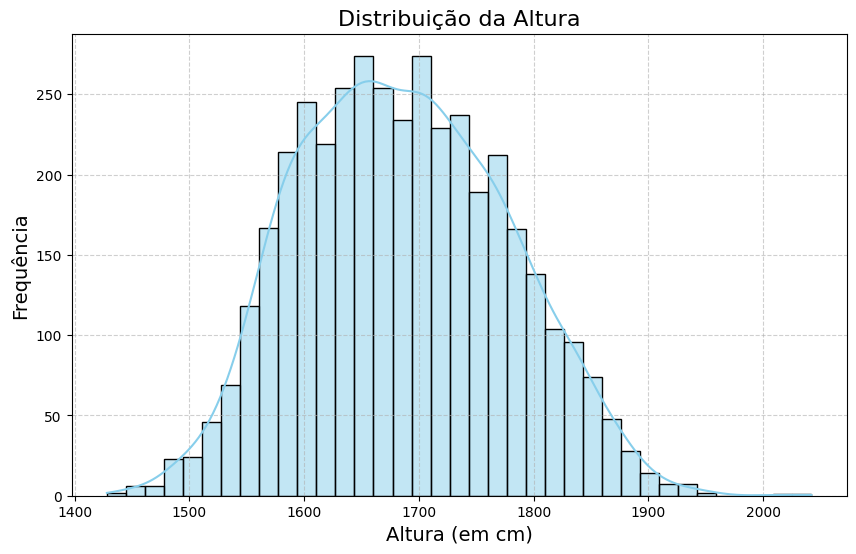

In [ ]:
# Histograma da Altura
plt.figure(figsize=(10, 6))
sns.histplot(df['HEIGHT'], kde=True, color='skyblue')
plt.title("Distribuição da Altura", fontsize=16)
plt.xlabel("Altura (em cm)", fontsize=14)
plt.ylabel("Frequência", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

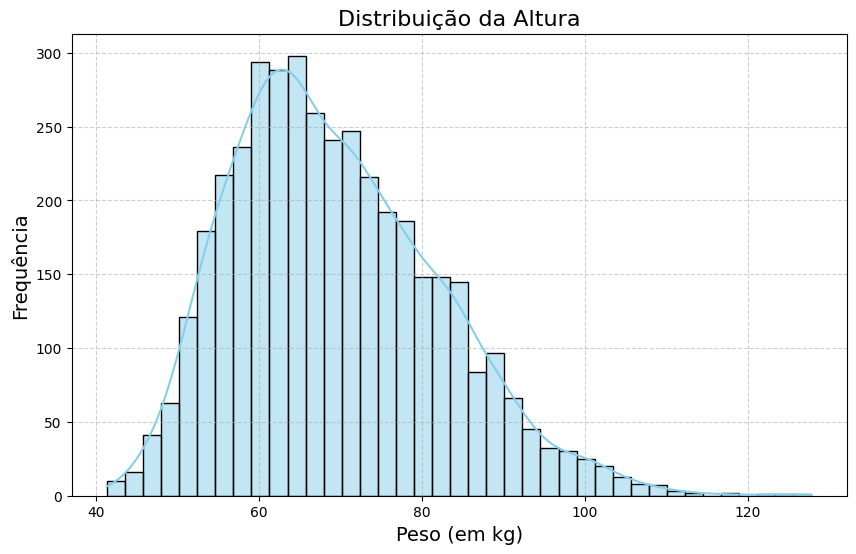

In [ ]:
# Histograma do Peso
plt.figure(figsize=(10, 6))
sns.histplot(df['WEIGHT'], kde=True, color='skyblue')
plt.title("Distribuição da Altura", fontsize=16)
plt.xlabel("Peso (em kg)", fontsize=14)
plt.ylabel("Frequência", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

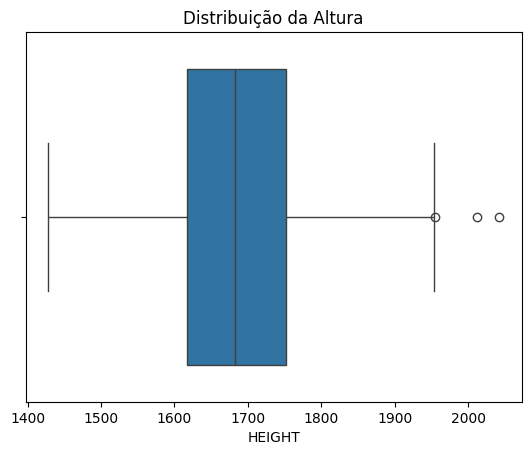

In [ ]:
# Boxplot da Altura
sns.boxplot(x=df['HEIGHT'])
plt.title("Distribuição da Altura")
plt.show()

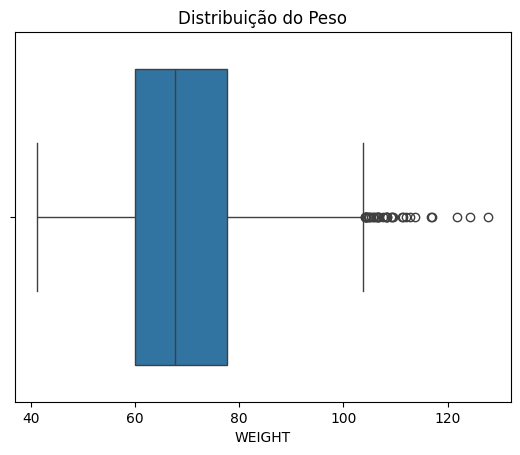

In [ ]:
# Boxplot do Peso
sns.boxplot(x=df['WEIGHT'])
plt.title("Distribuição do Peso")
plt.show()

In [ ]:
# Exibindo a matriz de correlação
matriz_correlacao = df.corr()
print(matriz_correlacao)

                      AGE    HEIGHT    WEIGHT  FOOT LENGTH  HEAD CIRC  \
AGE              1.000000  0.064280  0.208731     0.062725   0.127987   
HEIGHT           0.064280  1.000000  0.742103     0.839834   0.605172   
WEIGHT           0.208731  0.742103  1.000000     0.726535   0.664807   
FOOT LENGTH      0.062725  0.839834  0.726535     1.000000   0.609904   
HEAD CIRC        0.127987  0.605172  0.664807     0.609904   1.000000   
CHEST CIRC       0.242302  0.533395  0.885991     0.535901   0.554317   
NECK CIRC        0.129234  0.717236  0.835495     0.733327   0.688460   
WAIST CIRC       0.322090  0.567222  0.904490     0.581220   0.584411   
SHOULDER WIDTH   0.148213  0.711574  0.899495     0.711072   0.646193   
SITTING HT       0.088564  0.862724  0.673244     0.654017   0.549051   
SITTING KNEE HT  0.051462  0.922592  0.727840     0.863267   0.578812   
SITTING EYE HT   0.101150  0.846803  0.648455     0.632652   0.500286   
NAVAL HT         0.006183  0.945942  0.653178     0

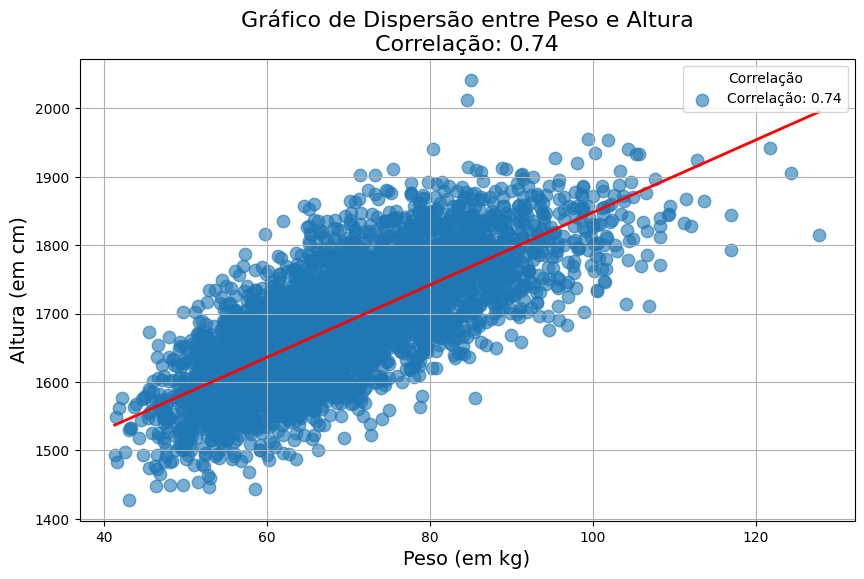

Correlação entre Peso e Altura (Geral): 0.74


In [ ]:
# Calcular a correlação entre 'HEIGHT' e 'WEIGHT'
correlacao_geral = df['HEIGHT'].corr(df['WEIGHT'])

# Criar a figura antes do gráfico para garantir o tamanho correto
plt.figure(figsize=(10, 6))

# Gráfico de dispersão com a reta de regressão
sns.regplot(
    x='WEIGHT',
    y='HEIGHT',
    data=df,
    scatter_kws={'alpha': 0.6, 's': 80},
    line_kws={'color': 'red', 'lw': 2},
    ci=None,
    marker='o'
)
plt.title(f'Gráfico de Dispersão entre Peso e Altura\nCorrelação: {correlacao_geral:.2f}', fontsize=16)
plt.xlabel('Peso (em kg)', fontsize=14)
plt.ylabel('Altura (em cm)', fontsize=14)
plt.grid(True)

# Adicionar legenda
plt.legend([f'Correlação: {correlacao_geral:.2f}'], title='Correlação')

# Exibir o gráfico
plt.show()

# Exibir a correlação
print(f'Correlação entre Peso e Altura (Geral): {correlacao_geral:.2f}')

Com base na análise da matriz de correlação e no gráfico de dispersão, ao analisararmos as duas variáveis, peso e altura, fica claro que possuem uma correlação positiva forte, de tal maneira que quando uma váriavel aumenta a outra também cresce mas com algumas variações. Porém, vale lembrar que em estatística correlação não implica em causalidade, como as váriaveis peso e altura dos dados da ANSUR 1998, que apresentam uma correlação mas uma não necessariamente causa a outra.

In [ ]:
# Exibindo colunas
print(df.columns)

Index(['AGE', 'HEIGHT', 'WEIGHT', 'FOOT LENGTH', 'HEAD CIRC', 'CHEST CIRC',
       'NECK CIRC', 'WAIST CIRC', 'SHOULDER WIDTH', 'SITTING HT',
       'SITTING KNEE HT', 'SITTING EYE HT', 'NAVAL HT', 'PUPILS DIST',
       'ARM SPAN', 'WRITING HAND', 'GENDER (1=M)'],
      dtype='object')


In [ ]:
# Verificando os valores únicos na coluna GENDER (1=M)
print(df['GENDER (1=M)'].unique())

[1 0]


In [ ]:
distribuicao_genero = df['GENDER (1=M)'].value_counts()
print(distribuicao_genero)

GENDER (1=M)
0    2208
1    1774
Name: count, dtype: int64


Na amostra da ANSUR I 1998, a váriavel "0" da coluna "GENDER" representa a quantidade de mulheres e a váriavel 1 a quantidade de homens. Observando as duas váriaveis, é possível verificar uma diferença siginificativa entre mulheres e homens, um número exato de 434 mulheres a mais na amostra da ANSUR 1 1998, o que pode resultar numa diferença significativa ao analisar as váriaveis altura e peso por gênero.

In [ ]:
# Calcular médias por gênero
media_peso_por_genero = df.groupby('GENDER (1=M)')['WEIGHT'].mean()
print("Média de Peso por Gênero:")
print(media_peso_por_genero)

# Calcular desvios padrão por gênero
desvio_padrao_peso_por_genero = df.groupby('GENDER (1=M)')['WEIGHT'].std()
print("\nDesvio Padrão de Peso por Gênero:")
print(desvio_padrao_peso_por_genero)

# Calcular o coeficiente de variação
cv_peso_por_genero = (desvio_padrao_peso_por_genero / media_peso_por_genero) * 100
print("\nCoeficiente de Variação (Peso) por Gênero (%):")
print(cv_peso_por_genero)


Média de Peso por Gênero:
GENDER (1=M)
0    62.014900
1    78.486809
Name: WEIGHT, dtype: float64

Desvio Padrão de Peso por Gênero:
GENDER (1=M)
0     8.351159
1    11.106416
Name: WEIGHT, dtype: float64

Coeficiente de Variação (Peso) por Gênero (%):
GENDER (1=M)
0    13.466374
1    14.150679
Name: WEIGHT, dtype: float64


A média dos pesos é maior para os homens do que para as mulheres e a dispersão em relação a média dos homens é maior do que nas mulheres e o coeficiente de variação dos homens  é de 14.15% enquanto o das mulheres é de 13.46%, isso indica que o peso dos homens tem uma maior variação relativa à média em comparação ao das mulheres.

In [ ]:
# Calcular a média da altura por gênero
media_altura_por_genero = df.groupby('GENDER (1=M)')['HEIGHT'].mean()
print("Média de Altura por Gênero:")
print(media_altura_por_genero)

# Calcular o desvio padrão da altura por gênero
desvio_padrao_altura_por_genero = df.groupby('GENDER (1=M)')['HEIGHT'].std()
print("\nDesvio Padrão de Altura por Gênero:")
print(desvio_padrao_altura_por_genero)

# Calcular o coeficiente de variação (CV) da altura por gênero
cv_altura_por_genero = (desvio_padrao_altura_por_genero / media_altura_por_genero) * 100
print("\nCoeficiente de Variação (Altura) por Gênero (%):")
print(cv_altura_por_genero)

Média de Altura por Gênero:
GENDER (1=M)
0    1629.372283
1    1755.807779
Name: HEIGHT, dtype: float64

Desvio Padrão de Altura por Gênero:
GENDER (1=M)
0    63.603923
1    66.807235
Name: HEIGHT, dtype: float64

Coeficiente de Variação (Altura) por Gênero (%):
GENDER (1=M)
0    3.903584
1    3.804929
Name: HEIGHT, dtype: float64


A média das alturas é maior para os homens do que para as mulheres e a dispersão em relação a média dos homens é maior do que nas mulheres o coeficiete de variação dos homens é de 3.8% enquanto o das mulheres é de 3.9%, isso indica que o altura dos homens tem uma menor variação relativa à média em comparação ao das mulheres.

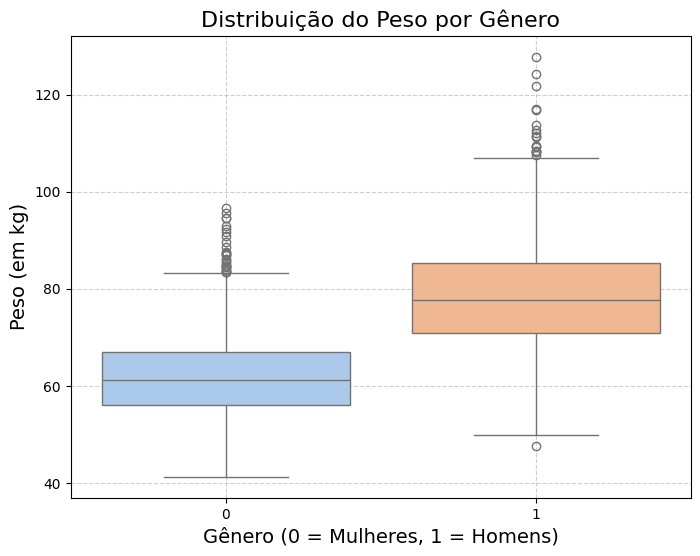

In [ ]:
# Boxplot de Altura por Gênero
plt.figure(figsize=(8, 6))
sns.boxplot(x='GENDER (1=M)', y='WEIGHT', data=df, hue='GENDER (1=M)', palette='pastel', legend=False)
plt.title("Distribuição do Peso por Gênero", fontsize=16)
plt.xlabel("Gênero (0 = Mulheres, 1 = Homens)", fontsize=14)
plt.ylabel("Peso (em kg)", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

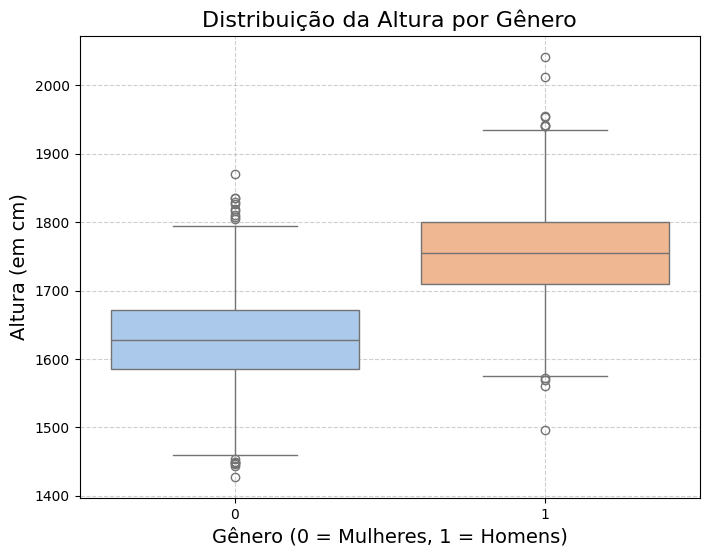

In [ ]:
# Boxplot de Altura por Gênero
plt.figure(figsize=(8, 6))
sns.boxplot(x='GENDER (1=M)', y='HEIGHT', data=df, hue='GENDER (1=M)', palette='pastel', legend=False)
plt.title("Distribuição da Altura por Gênero", fontsize=16)
plt.xlabel("Gênero (0 = Mulheres, 1 = Homens)", fontsize=14)
plt.ylabel("Altura (em cm)", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Ao analisarmos a váriavel peso, observamos que o grupo das mulheres apresenta uma maior consistênca em relação ao grupo dos homens. Já no que diz respeito a váriavel altura, observamos que o grupo dos homens apresentam um maior consistência em relação ao grupo das mulheres. Sendo assim, as váriaveis peso e altura tem um comportamento diferente quando analisadas por genêro.